In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df=pd.read_csv("globalterrorismdb_0221dist_GTDdata.csv")

df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_4360\581428942.py:1: DtypeWarning: Columns (4,31,33,54,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("globalterrorismdb_0221dist_GTDdata.csv")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Columns: 135 entries, eventid to related
dtypes: float64(53), int64(24), object(58)
memory usage: 207.2+ MB


In [61]:
### Filter data

cols = ['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city', 'latitude', 'longitude',
        'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'nkill', 'nwound', 'gname']

df[cols]

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,nkill,nwound,gname
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,1.0,0.0,MANO-D
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,0.0,23rd of September Communist League
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,1.0,0.0,Unknown
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),NaN,NaN,Unknown
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201178,201912310028,2019,12,31,Iraq,Middle East & North Africa,Baghdad,Baghdad,33.303567,44.371771,1,0,Bombing/Explosion,Private Citizens & Property,0.0,0.0,Unknown
201179,201912310030,2019,12,31,Sudan,Sub-Saharan Africa,West Darfur,El Geneina,13.440886,22.441728,1,0,Unknown,Police,2.0,1.0,Unknown
201180,201912310031,2019,12,31,Sudan,Sub-Saharan Africa,West Darfur,El Geneina,13.440886,22.441728,1,0,Armed Assault,Government (General),2.0,0.0,Unknown
201181,201912310032,2019,12,31,India,South Asia,Jammu and Kashmir,Bagiot Dora,33.812790,74.097730,1,0,Bombing/Explosion,Private Citizens & Property,0.0,1.0,Unknown


In [62]:
df[['iyear', 'imonth', 'iday']] = df[['iyear', 'imonth', 'iday']].astype(str)



In [63]:
df['date'] = pd.to_datetime(df[['iyear', 'imonth', 'iday']].astype(str).agg('-'.join, axis=1), format="%Y-%m-%d", errors='coerce')

df.columns


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY', 'related', 'date'],
      dtype='object', length=136)

In [64]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1970-07-02
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,NaT
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaT
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaT
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201178,201912310028,2019,12,31,"December 31, 2019",0,NaN,95,Iraq,10,...,"""Iraq: ISHM 235: December 20, 2019 - January 2...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,2019-12-31
201179,201912310030,2019,12,31,NaN,0,NaN,195,Sudan,11,...,"""World: Protection in Danger Monthly News Brie...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,2019-12-31
201180,201912310031,2019,12,31,"December 31, 2019",0,NaN,195,Sudan,11,...,"""World: Protection in Danger Monthly News Brie...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,2019-12-31
201181,201912310032,2019,12,31,NaN,0,NaN,92,India,6,...,"""Civilian injured in landmine blast in Indian-...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,2019-12-31


In [65]:
#cleanning rows with wrong dates
df= df.dropna(subset=["date"])
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1970-07-02
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN,1970-01-01
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1970-01-02
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN,1970-01-02
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN,1970-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201178,201912310028,2019,12,31,"December 31, 2019",0,NaN,95,Iraq,10,...,"""Iraq: ISHM 235: December 20, 2019 - January 2...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,2019-12-31
201179,201912310030,2019,12,31,NaN,0,NaN,195,Sudan,11,...,"""World: Protection in Danger Monthly News Brie...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,2019-12-31
201180,201912310031,2019,12,31,"December 31, 2019",0,NaN,195,Sudan,11,...,"""World: Protection in Danger Monthly News Brie...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,2019-12-31
201181,201912310032,2019,12,31,NaN,0,NaN,92,India,6,...,"""Civilian injured in landmine blast in Indian-...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,2019-12-31


In [67]:
# Remove duplicates

df=df.drop_duplicates()
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1970-07-02
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN,1970-01-01
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1970-01-02
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN,1970-01-02
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN,1970-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201178,201912310028,2019,12,31,"December 31, 2019",0,NaN,95,Iraq,10,...,"""Iraq: ISHM 235: December 20, 2019 - January 2...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,2019-12-31
201179,201912310030,2019,12,31,NaN,0,NaN,195,Sudan,11,...,"""World: Protection in Danger Monthly News Brie...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,2019-12-31
201180,201912310031,2019,12,31,"December 31, 2019",0,NaN,195,Sudan,11,...,"""World: Protection in Danger Monthly News Brie...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,2019-12-31
201181,201912310032,2019,12,31,NaN,0,NaN,92,India,6,...,"""Civilian injured in landmine blast in Indian-...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,2019-12-31


In [68]:
df["country_txt"] = df["country_txt"].str.upper()

In [69]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date
0,197000000001,1970,7,2,NaN,0,NaN,58,DOMINICAN REPUBLIC,2,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1970-07-02
5,197001010002,1970,1,1,NaN,0,NaN,217,UNITED STATES,1,...,"""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN,1970-01-01
6,197001020001,1970,1,2,NaN,0,NaN,218,URUGUAY,3,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1970-01-02
7,197001020002,1970,1,2,NaN,0,NaN,217,UNITED STATES,1,...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN,1970-01-02
8,197001020003,1970,1,2,NaN,0,NaN,217,UNITED STATES,1,...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN,1970-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201178,201912310028,2019,12,31,"December 31, 2019",0,NaN,95,IRAQ,10,...,"""Iraq: ISHM 235: December 20, 2019 - January 2...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,2019-12-31
201179,201912310030,2019,12,31,NaN,0,NaN,195,SUDAN,11,...,"""World: Protection in Danger Monthly News Brie...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,2019-12-31
201180,201912310031,2019,12,31,"December 31, 2019",0,NaN,195,SUDAN,11,...,"""World: Protection in Danger Monthly News Brie...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,2019-12-31
201181,201912310032,2019,12,31,NaN,0,NaN,92,INDIA,6,...,"""Civilian injured in landmine blast in Indian-...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,2019-12-31


In [70]:
# Normalize data types

cols_to_convert = ["iyear", "imonth","iday","extended","country", "region"]

df[cols_to_convert] = df[cols_to_convert].astype(int)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200292 entries, 0 to 201182
Columns: 136 entries, eventid to date
dtypes: datetime64[ns](1), float64(53), int32(6), int64(18), object(58)
memory usage: 204.8+ MB


In [75]:
df["INT_LOG"].dtypes

dtype('int64')

In [78]:
##when we want to filtrate data type

df.dtypes[df.dtypes=='float']

latitude          float64
longitude         float64
specificity       float64
alternative       float64
attacktype2       float64
attacktype3       float64
targsubtype1      float64
natlty1           float64
targtype2         float64
targsubtype2      float64
natlty2           float64
targtype3         float64
targsubtype3      float64
natlty3           float64
guncertain1       float64
guncertain2       float64
guncertain3       float64
nperps            float64
nperpcap          float64
claimed           float64
claimmode         float64
claim2            float64
claimmode2        float64
claim3            float64
claimmode3        float64
compclaim         float64
weapsubtype1      float64
weaptype2         float64
weapsubtype2      float64
weaptype3         float64
weapsubtype3      float64
weaptype4         float64
weapsubtype4      float64
nkill             float64
nkillus           float64
nkillter          float64
nwound            float64
nwoundus          float64
nwoundte    

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [80]:
attacks_by_year=df.groupby(df["date"].dt.year).count()
                           
                           

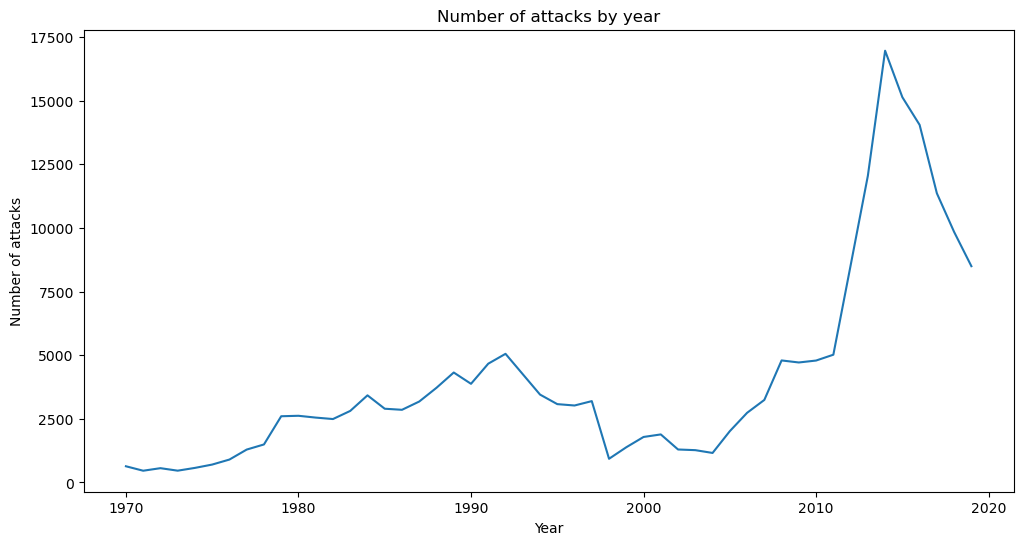

In [90]:
# plot the number of attacks over time

plt.figure(figsize=(12,6))

sns.lineplot(data=attacks_by_year["country"])

plt.title("Number of attacks by year")
plt.xlabel("Year")
plt.ylabel("Number of attacks")
plt.show()
           


In [87]:
casualties_by_year=df.groupby(df["date"].dt.year).sum()[['nkill', 'nwound']]

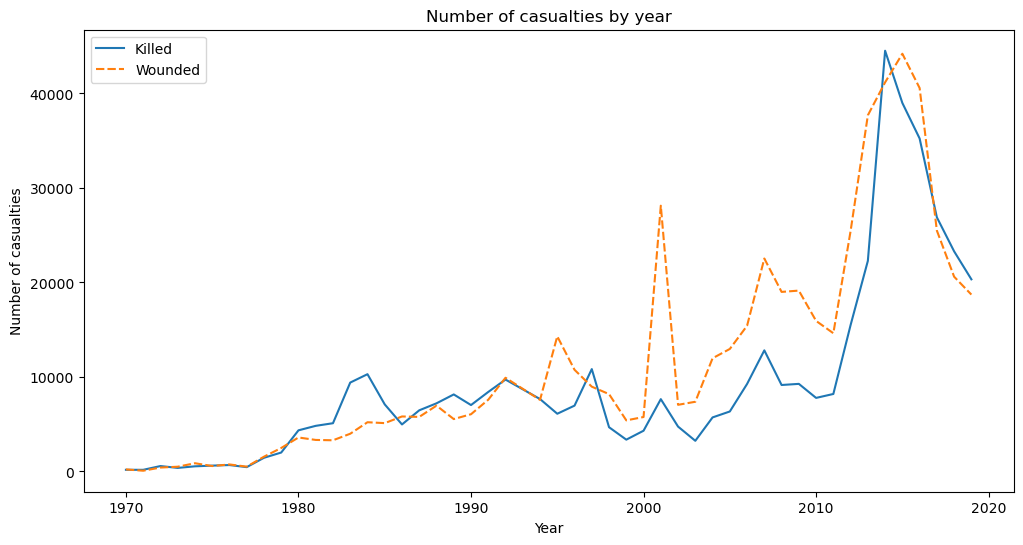

In [93]:
plt.figure(figsize=(12,6))

sns.lineplot(data=casualties_by_year)

plt.title("Number of casualties by year")
plt.xlabel("Year")
plt.ylabel("Number of casualties")

plt.legend(["Killed", "Wounded"])
plt.show()

In [95]:
# calculate the average number of casualties per attack by year

avg_casualties_annual=df.groupby(df["date"].dt.year).mean()[['nkill', 'nwound']]




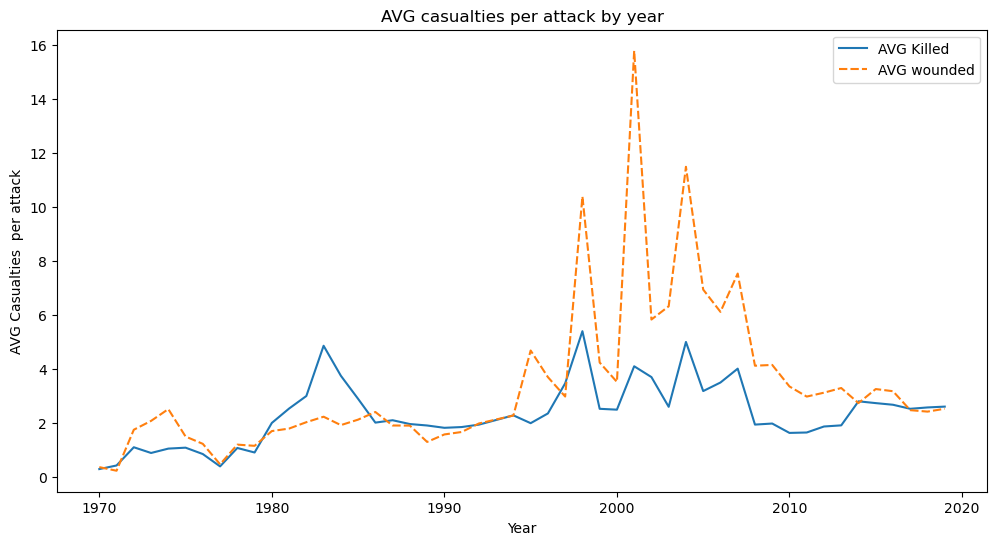

In [97]:
plt.figure(figsize=(12,6))

sns.lineplot(data=avg_casualties_annual)

plt.title("AVG casualties per attack by year")
plt.ylabel("AVG Casualties  per attack")
plt.xlabel("Year")
plt.legend(["AVG Killed", "AVG wounded"])

plt.show()